In [3]:
%pip install highlight-text
import matplotlib.pyplot as plt
import pandas as pd
from highlight_text import fig_text

#Load the data

df=pd.read_html('https://fbref.com/en/matches/118f8df8/Nottingham-Forest-Liverpool-January-14-2025-Premier-League', attrs={'id': 'shots_all'})[0]

Note: you may need to restart the kernel to use updated packages.


In [4]:
df.head()

Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
              Minute               Player              Squad   
0                  3  Alexis Mac Allister          Liverpool   
1                  4           Cody Gakpo          Liverpool   
2                  6     Ryan Gravenberch          Liverpool   
3                  7     Ryan Gravenberch          Liverpool   
4                  8           Chris Wood    Nott'ham Forest   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0  \
                  xG               PSxG            Outcome           Distance   
0               0.02               0.00         Off Target               28.0   
1               0.01               0.00         Off Target               28.0   
2               0.02               0.00         Off Target               32.0   
3               0.06               0.00         Off Target               14.0   
4               0.25               0.76               Goal               11.0   

  Unnamed: 7_level_0 Unnamed: 8_level_0           SCA 1               \
           Body Part              Notes          Player        Event   
0         Right Foot                NaN       Luis Díaz  Pass (Live)   
1         Right Foot                NaN      Cody Gakpo      Take-On   
2         Right Foot                NaN             NaN          NaN   
3         Right Foot                NaN   Mohamed Salah  Pass (Live)   
4          Left Foot                NaN  Anthony Elanga  Pass (Live)   

                SCA 2               
               Player        Event  
0          Cody Gakpo  Pass (Live)  
1                 NaN          NaN  
2                 NaN          NaN  
3    Ryan Gravenberch  Pass (Live)  
4  Callum Hudson-Odoi  Pass (Live)

In [5]:
#Clean the data
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

df.columns = df.columns.droplevel(0)
df.columns

Index(['Minute', 'Player', 'Squad', 'xG', 'PSxG', 'Outcome', 'Distance',
       'Body Part', 'Notes'],
      dtype='object')

In [6]:
# And filter the columns we need
df = df[['Squad', 'Player', 'Minute', 'xG', 'Outcome']]
df.head()

,Squad,Player,Minute,xG,Outcome
0,Liverpool,Alexis Mac Allister,3,0.02,Off Target
1,Liverpool,Cody Gakpo,4,0.01,Off Target
2,Liverpool,Ryan Gravenberch,6,0.02,Off Target
3,Liverpool,Ryan Gravenberch,7,0.06,Off Target
4,Nott'ham Forest,Chris Wood,8,0.25,Goal


In [7]:
# Now let's create a column for the cumulative xG for each team
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()
df

,Squad,Player,Minute,xG,Outcome,cumulative_xG
0,Liverpool,Alexis Mac Allister,3,0.02,Off Target,0.02
1,Liverpool,Cody Gakpo,4,0.01,Off Target,0.03
2,Liverpool,Ryan Gravenberch,6,0.02,Off Target,0.05
3,Liverpool,Ryan Gravenberch,7,0.06,Off Target,0.11
4,Nott'ham Forest,Chris Wood,8,0.25,Goal,0.25
5,Nott'ham Forest,Murillo,10,0.02,Off Target,0.27
6,Nott'ham Forest,Callum Hudson-Odoi,14,0.03,Saved,0.30
7,Liverpool,Luis Díaz,24,0.03,Off Target,0.14
8,Liverpool,Cody Gakpo,25,0.07,Off Target,0.21
9,Liverpool,Dominik Szoboszlai,28,0.21,Blocked,0.42


In [8]:
# We also need to get the minute in a format that we can use to plot the flow chart
# Let's first drop the nan values that FBREF uses as a divider
# So let's drop that nan row and then cast to an int
df = df.dropna(subset=['Minute'])
df['Minute']

0        3
1        4
2        6
3        7
4        8
5       10
6       14
7       24
8       25
9       28
10      41
11      41
13      51
14      58
15      59
16      63
17      66
18      69
19      74
20      77
21      79
22      81
23      81
24      83
25      86
26      88
27      88
28      89
29    90+2
Name: Minute, dtype: object

In [9]:
# You might also see that some minutes have a '+' in them, which means that the minute is the minute of the first half plus the minute of the second half
# Let's also create a column that shows which half the minute is 
# (since we can have a 46th minute in the first half and a 46th minute in the second half)
df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)
df

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_81169/3340019740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)


,Squad,Player,Minute,xG,Outcome,cumulative_xG,half
0,Liverpool,Alexis Mac Allister,3,0.02,Off Target,0.02,1
1,Liverpool,Cody Gakpo,4,0.01,Off Target,0.03,1
2,Liverpool,Ryan Gravenberch,6,0.02,Off Target,0.05,1
3,Liverpool,Ryan Gravenberch,7,0.06,Off Target,0.11,1
4,Nott'ham Forest,Chris Wood,8,0.25,Goal,0.25,1
5,Nott'ham Forest,Murillo,10,0.02,Off Target,0.27,1
6,Nott'ham Forest,Callum Hudson-Odoi,14,0.03,Saved,0.30,1
7,Liverpool,Luis Díaz,24,0.03,Off Target,0.14,1
8,Liverpool,Cody Gakpo,25,0.07,Off Target,0.21,1
9,Liverpool,Dominik Szoboszlai,28,0.21,Blocked,0.42,1


In [10]:
# Now let's adjust the minute to add the minutes if there is a '+' in the minute
df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))
df['Minute']

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_81169/3789240490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))


0      3
1      4
2      6
3      7
4      8
5     10
6     14
7     24
8     25
9     28
10    41
11    41
13    51
14    58
15    59
16    63
17    66
18    69
19    74
20    77
21    79
22    81
23    81
24    83
25    86
26    88
27    88
28    89
29    92
Name: Minute, dtype: int64

Text(0.1, 0.0, '@hazanserifli/Nottingham_Liverpool_Analysis')

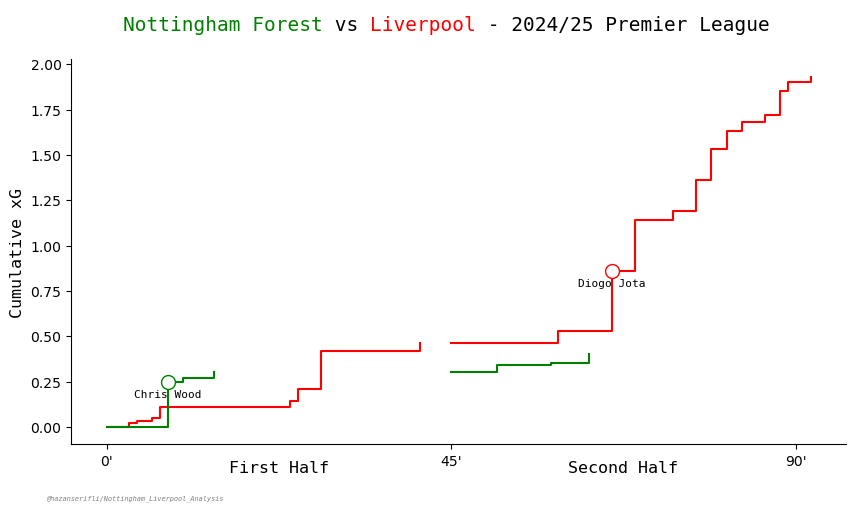

In [18]:


team_colors = {
    'Nottingham Forest': 'green',
    'Liverpool': 'red'
}

# Set a default color if no specific color is found
default_color = 'green'  # Change the fallback color to your preferred one


fig, ax = plt.subplots(figsize=(10, 5))

# Iterate over teams and plot cumulative xG by half
for team in df['Squad'].unique():
    team_df = df[df['Squad'] == team].copy()

    # Add a 0 xG row at the start of the match
    start_row = pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': 'Goal', 
                              'cumulative_xG': 0, 'half': 1}, index=[0])
    team_df = pd.concat([start_row, team_df], ignore_index=True)

    # Add a row at the beginning of the second half if applicable
    if (team_df['half'] == 1).any():
        half_time_row = pd.DataFrame({'Squad': team, 'Minute': 45, 'xG': 0, 'Outcome': 'Goal', 
                                      'cumulative_xG': team_df[team_df['half'] == 1]['cumulative_xG'].iloc[-1], 
                                      'half': 2}, index=[0])
        team_df = pd.concat([team_df[team_df['half'] == 1], half_time_row, team_df[team_df['half'] == 2]], 
                            ignore_index=True)

    # Plot for each half
    team_color = team_colors.get(team, default_color)  # Get the color for the team, or default color
    for half in team_df['half'].unique():
        half_df = team_df[team_df['half'] == half]
        ax.plot(
            half_df['Minute'], 
            half_df['cumulative_xG'], 
            label=team, 
            drawstyle='steps-post',
            color=team_color
        )

# Highlight goals with scatter points and labels
for team in df['Squad'].unique():
    goal_events = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for event in goal_events:
        team_color = team_colors.get(team, default_color)  # Get the color for the team, or default color
        ax.scatter(
            event['Minute'], 
            event['cumulative_xG'], 
            c='white',
            edgecolor=team_color,
            s=100,
            zorder=5
        )
        
        # Label goals with player names
        ax.text(
            event['Minute'], 
            event['cumulative_xG'] - 0.07, 
            event['Player'], 
            ha='center', 
            va='center', 
            fontfamily='monospace', 
            fontsize=8,
            zorder=10
        )

# Customize plot appearance
ax.set_xticks([0, 45, 90])
ax.set_xticklabels(['0\'', '45\'', '90\''])
ax.text(22.5, -0.25, 'First Half', ha='center', fontfamily='monospace', fontsize=12)
ax.text(67.5, -0.25, 'Second Half', ha='center', fontfamily='monospace', fontsize=12)
ax.set_ylabel('Cumulative xG', fontfamily='monospace', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add title with team colors
fig_text(
    0.5,
    0.95,
    '<Nottingham Forest> vs <Liverpool> - 2024/25 Premier League', 
    fontsize=14, 
    ha='center', 
    va='center', 
    ax=ax, 
    fontfamily='monospace', 
    highlight_textprops=[{'color': team_colors['Nottingham Forest']}, {'color': team_colors['Liverpool']}]
)

# Add attribution
fig.text(
    0.1, 
    0.00, 
    '@hazanserifli/Nottingham_Liverpool_Analysis', 
    fontsize=5, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='gray'
)


